In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dictys
import joblib

In [2]:
from utils_custom import *
from pseudotime_curves import *
from episodic_dynamics import *

In [3]:
# Define file paths 
output_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/outs/dictys/rbpj_ntc/output'

### Inspect individual TFs

In [4]:
# Load data
dictys_dynamic_object = dictys.net.dynamic_network.from_file(os.path.join(output_folder, 'dynamic.h5'))

TCellExhaustion


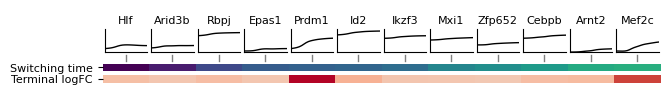

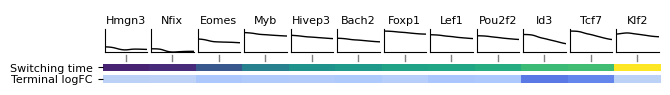

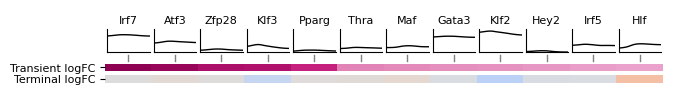

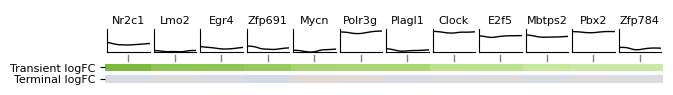

In [34]:
#Trajectory branch defined as (starting node, ending node) from trajectory inference
branches={
	'TCellExhaustion':(0,1)
}

for branchname in branches:
	print(branchname)
	figs=dictys_dynamic_object.draw_discover(*branches[branchname],ntops=(12,12,12,12),num=20,dist=0.001,mode='TF_expression')
	plt.show()

In [30]:
exp_curves_dy, exp_curves_dx = SmoothedCurves(dictys_dynamic_object,
    trajectory_range=(0,1),
    num_points=40,
    dist=0.002,
    sparsity=0.01,
    mode="expression").get_smoothed_curves()

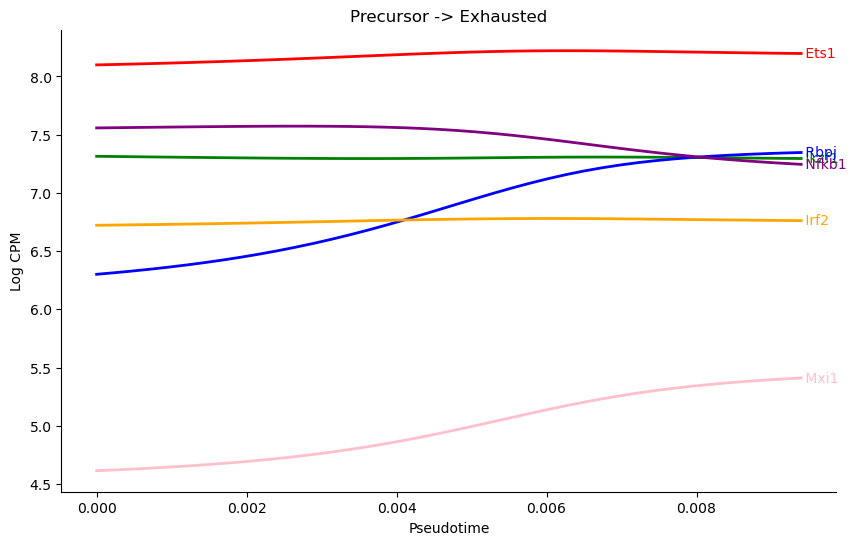

In [33]:
# Plot expression trajectories
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlight specific genes
genes_of_interest = ['Ikzf1','Rbpj','Ets1','Irf2','Nfkb1','Mxi1']
colors = ['green','blue','red','orange','purple','pink']   # Define colors for each gene

for gene, color in zip(genes_of_interest, colors):
    if gene in exp_curves_dy.index:
        line = plt.plot(exp_curves_dx, exp_curves_dy.loc[gene], linewidth=2, color=color)
        # Add label at the end of the line
        plt.text(exp_curves_dx.iloc[-1], exp_curves_dy.loc[gene].iloc[-1], f' {gene}', 
                color=color, 
                verticalalignment='center')

plt.xlabel('Pseudotime')
plt.ylabel('Log CPM')
plt.title('Precursor -> Exhausted')
plt.show()

In [31]:
reg_curves_dy, reg_curves_dx = SmoothedCurves(dictys_dynamic_object,
    trajectory_range=(0,1),
    num_points=40,
    dist=0.002,
    sparsity=0.01,
    mode="regulation").get_smoothed_curves()

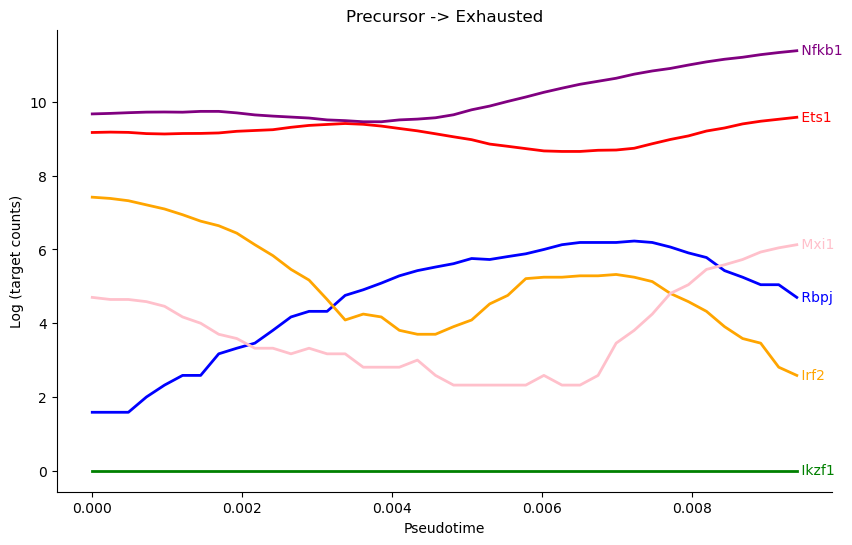

In [32]:
# Plot expression trajectories
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlight specific genes
genes_of_interest = ['Ikzf1','Rbpj','Ets1','Irf2','Nfkb1','Mxi1']
colors = ['green','blue','red','orange','purple','pink']   # Define colors for each gene

for gene, color in zip(genes_of_interest, colors):
    if gene in reg_curves_dy.index:
        line = plt.plot(reg_curves_dx, reg_curves_dy.loc[gene], linewidth=2, color=color)
        # Add label at the end of the line
        plt.text(reg_curves_dx.iloc[-1], reg_curves_dy.loc[gene].iloc[-1], f' {gene}', 
                color=color, 
                verticalalignment='center')

plt.xlabel('Pseudotime')
plt.ylabel('Log (target counts)')
plt.title('Precursor -> Exhausted')
plt.show()

## Episodically enriched TFs

In [7]:
# ETS1 KO
ets1_lf_sig1 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ets1_lfs/feature_list_Z7.txt", sep='\t')['names'].tolist()
ets1_lf_sig2 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ets1_lfs/feature_list_Z28.txt", sep='\t')['names'].tolist()
ets1_lf_int1 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ets1_lfs/feature_list_Z16.txt", sep='\t')['names'].tolist()
ets1_lf_int2 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ets1_lfs/feature_list_Z26.txt", sep='\t')['names'].tolist()

#create a set of all latent factors
ets1_all_lfs = set(ets1_lf_sig1 + ets1_lf_sig2 + ets1_lf_int1 + ets1_lf_int2)
display(len(ets1_all_lfs))

104

In [8]:
# IKZF1 KO
ikzf1_lf_sig = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ikzf1_lfs/feature_list_Z7.txt", sep='\t')['names'].tolist()
ikzf1_lf_int1 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ikzf1_lfs/feature_list_Z18.txt", sep='\t')['names'].tolist()
ikzf1_lf_int2 = pd.read_csv("/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/Data/latent_factors/ikzf1_lfs/feature_list_Z29.txt", sep='\t')['names'].tolist()

#create a set of all latent factors
ikzf1_all_lfs = set(ikzf1_lf_sig + ikzf1_lf_int1 + ikzf1_lf_int2)
display(len(ikzf1_all_lfs))

109

In [9]:
enrichment_outs = "/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/outs/dictys/rbpj_ntc/output/ikzf1"

In [10]:
# time slice is the number of windows in the episode based on the sampled num_points
run_episode(
    episode_idx=1,
    dictys_dynamic_object_path=os.path.join(output_folder, 'dynamic.h5'),
    output_folder=enrichment_outs,
    trajectory_range=(0, 1),
    num_points=24,
    time_slice_start=0,
    time_slice_end=4, # last index is excluded
    lf_genes=ikzf1_all_lfs,
    percentile=98
)

Processing 2,370,323 rows using 16 processes...
Chunk size: 8,000 rows
Direction invariance check: Enabled
Time columns: ['time_0', 'time_1', 'time_2', 'time_3']
Creating index chunks...
Created 297 chunks of indices


Processing chunks: 100%|██████████| 297/297 [02:54<00:00,  1.70it/s]


Processing completed in 174.78 seconds
Sorting results...
Creating result DataFrame...
Processing 956,116 edges using 20 processes...
Chunk size: 30,000 rows
Time columns: ['time_0', 'time_1', 'time_2', 'time_3']
Beta curves shape: (956116, 4)
TF expression shape: (430, 4)
Created 31 chunks
Chunk sizes: [30843, 30843, 30843, 30843, 30843]...


Processing chunks: 100%|██████████| 31/31 [00:02<00:00, 12.74it/s]


Processing completed in 3.01 seconds
Combining results...
Final shape: (956116, 4)


'/ocean/projects/cis240075p/asachan/datasets/B_Cell/T_cell/outs/dictys/rbpj_ntc/output/ikzf1/enrichment_episode_1.csv'